In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
from scipy.ndimage import zoom
from imutils import face_utils
from scipy.spatial import distance
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.backend import set_session
from tensorflow.keras.models import Sequential

In [2]:
shape_x = 48
shape_y = 48

Model load

In [3]:
model = load_model('save_files/EmotionDetectionModel.h5')
face_haar_cascade = cv2.CascadeClassifier('save_files/haarcascade_frontalface_default.xml')

Start the web camera

In [4]:
cap = cv2.VideoCapture(0)

Video capturing cycle. To break from it press "q".

In [5]:
emotion = []

xs = []
ys = []

i = 0

while True:
    # Captures test_img from the video stream
    # and returns boolean value and captured image
    ret, test_img = cap.read()
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    face_index = 0
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img, (x,y), (x+w,y+h), (255,0,0), thickness=7)
        roi_gray = gray_img[y:y+w, x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        # Get the prediction from trained mpdel
        predictions = model.predict(img_pixels)
        predictions_result = np.argmax(predictions)
        
        # Display class probabilities
        cv2.putText(test_img, "Angry : " + str(round(predictions[0][0],3)),(10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 0)
        cv2.putText(test_img, "Disgust : " + str(round(predictions[0][1],3)),(10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 0)
        cv2.putText(test_img, "Fear : " + str(round(predictions[0][2],3)),(10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 1)
        cv2.putText(test_img, "Happy : " + str(round(predictions[0][3],3)),(10,90), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 1)
        cv2.putText(test_img, "Sad : " + str(round(predictions[0][4],3)),(10,110), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 1)
        cv2.putText(test_img, "Surprise : " + str(round(predictions[0][5],3)),(10,130), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 1)
        cv2.putText(test_img, "Neutral : " + str(round(predictions[0][6],3)),(10,150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 155, 1)
        
        # annotate main image with a label
        if predictions_result == 0 :
            cv2.putText(test_img, "Angry",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        elif predictions_result == 1 :
            cv2.putText(test_img, "Disgust",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        elif predictions_result == 2 :
            cv2.putText(test_img, "Fear",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        elif predictions_result == 3 :
            cv2.putText(test_img, "Happy",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        elif predictions_result == 4 :
            cv2.putText(test_img, "Sad",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        elif predictions_result == 5 :
            cv2.putText(test_img, "Surprise",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
        else :
            cv2.putText(test_img, "Neutral",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 10)
                         
        face_index += 1
        
        # Save the emotion at the time step
        emotion.append(predictions_result)
        ys.append(predictions_result)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

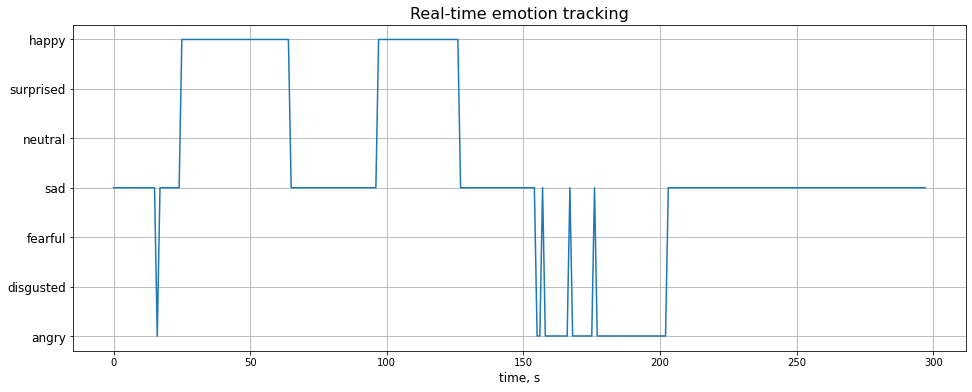

In [28]:
emotions = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
positions = [-4, -3, -2, -1, 0, 1, 2]
permutation = {
    6: 0,
    3: 2,
    5: 1,
    4: -1,
    2: -2,
    1: -3,
    0: -4,
}
y_shifted = [permutation[y] for y in ys]
emo_shifted = emotions.copy()
for i, _ in enumerate(emotions):
    emo_shifted[permutation[i]+4] = emotions[i]

plt.figure(figsize=(16, 6))
plt.plot(y_shifted)
plt.yticks(positions, labels=emo_shifted, fontsize=12)
plt.xlabel('time, s', fontsize=12)
plt.title('Real-time emotion tracking', fontsize=16)
plt.grid(True)